### Import Libraries

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/test'

### Creating Vgg16 Model

In [3]:
vgg16 = VGG16(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [4]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
for layer in vgg16.layers:
  layer.trainable= False

In [6]:
folder = glob('/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train/*')

In [7]:
folder

['/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train/ModerateDemented',
 '/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train/VeryMildDemented',
 '/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train/NonDemented',
 '/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train/MildDemented']

In [8]:
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(4,activation='softmax')(x)
model = Model(inputs=vgg16.input , outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

### Image Augumentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

### Train Test Split

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/train',
                             target_size = (224,224),
                             batch_size = 16,
                             class_mode='categorical')

Found 5121 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/Alzheimer_s Dataset/test',
                             target_size = (224,224),
                             batch_size = 16,
                             class_mode='categorical')

Found 1279 images belonging to 4 classes.


### Training Model

In [15]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-15-d15a3d1a543f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
321/321 [==============================] - 2594s 8s/step - loss: 1.1241 - accuracy: 0.5548 - val_loss: 0.9998 - val_accuracy: 0.5496
Epoch 2/10
321/321 [==============================] - 83s 260ms/step - loss: 0.8211 - accuracy: 0.6551 - val_loss: 1.0363 - val_accuracy: 0.5739
Epoch 3/10
321/321 [==============================] - 84s 262ms/step - loss: 0.7246 - accuracy: 0.7010 - val_loss: 1.4155 - val_accuracy: 0.5606
Epoch 4/10
321/321 [==============================] - 91s 282ms/step - loss: 0.6969 - accuracy: 0.7180 - val_loss: 1.0229 - val_accuracy: 0.6224
Epoch 5/10
321/321 [==============================] - 86s 268ms/step - loss: 0.6685 - accuracy: 0.7229 - val_loss: 0.9218 - val_accuracy: 0.6466
Epoch 6/10
321/321 [==============================] - 86s 267ms/step - loss: 0.5684 - accuracy: 0.7614 - val_loss: 1.2398 - val_accuracy: 0.5379
Epoch 7/10
321/321 [==============================] - 86s 269ms/step - loss: 0.5207 - accuracy: 0.7838 - val_loss: 1.3667 - val_acc

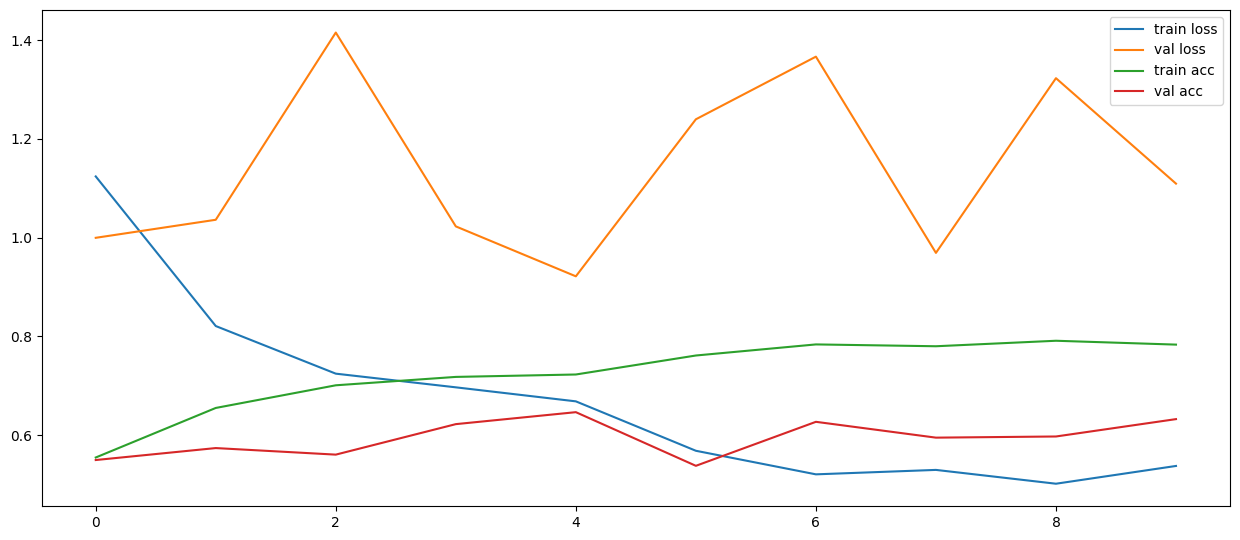

In [23]:
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 1)

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

### Exporting Model

In [24]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Alzheimers Prediction/VGG16.h5')